In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Carga desde un archivo .csv sin indice
df = pd.read_csv('Girona.csv')
df= df.drop(['Unnamed: 0'], axis=1)
df.head(5)


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,360,https://www.airbnb.com/rooms/360,20241230155646,2024-12-30,city scrape,Sit in the Peaceful Garden of the Chickadee Co...,Enjoy the famous Colorado weather and unplug i...,The cottage is located in the center of Lower ...,https://a0.muscache.com/pictures/monet/Select-...,666,...,4.96,5.00,5.00,5.00,4.92,2.0,2.0,0.0,0.0,2.35
1,364,https://www.airbnb.com/rooms/364,20241230155646,2024-12-30,city scrape,Lodo / RiNo LOFT via airport train,"Modern 1,000 square foot loft in the heart of ...","Ten brewpubs within walking distance, two grea...",https://a0.muscache.com/pictures/11766413/a2c5...,783,...,4.81,4.95,4.96,4.65,4.71,1.0,1.0,0.0,0.0,0.46
2,590,https://www.airbnb.com/rooms/590,20241230155646,2024-12-30,city scrape,Comfortable - and a great value!,"Large guest room in my home, where I also live...",I love the diversity of my neighborhood and it...,https://a0.muscache.com/pictures/d84d5bc6-f7cb...,933,...,4.90,4.93,4.95,4.76,4.85,2.0,0.0,0.0,0.0,3.85
3,592,https://www.airbnb.com/rooms/592,20241230155646,2024-12-30,city scrape,private,This room is in the basement. It does not hav...,,https://a0.muscache.com/pictures/ba522ff9-84c9...,933,...,4.90,4.95,4.95,4.82,4.87,2.0,0.0,0.0,0.0,0.93
4,1940,https://www.airbnb.com/rooms/1940,20241230155646,2024-12-30,city scrape,Baker Studio: Private-full kitchen-W/D-walkable,Private studio with separate entrance in histo...,Walking through the Baker historical neighborh...,https://a0.muscache.com/pictures/miso/Hosting-...,2150,...,4.98,4.98,4.98,4.90,4.88,1.0,1.0,0.0,0.0,2.20


In [3]:
# Mostrar todas las columnas del DataFrame
print(df.columns)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'bathrooms_text', 'amenities',
       'calendar_updated', 'has_availability', 'calendar_last_scraped',
       'first_review', 'last_review', 'license', 'instant_bookable',
       'host_listings_count', 'host_total_listings_count', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_mini

In [4]:
for col in ['host_acceptance_rate', 'host_response_rate']:
    df[col] = df[col].astype(str).str.replace('%', '', regex=False)  # Eliminar el signo %
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convertir a float, dejando NaN si hay errores

In [5]:
df.host_is_superhost = df.host_is_superhost.replace({'f': 0, 't': 1, 'False': 0})
df.host_identity_verified = df.host_identity_verified.replace({'f': 0, 't':1,'False':0})
df.instant_bookable = df.instant_bookable.replace({'f': 0, 't':1,'False':0})

C:\Users\luisb\AppData\Local\Temp\ipykernel_6732\811158007.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.host_is_superhost = df.host_is_superhost.replace({'f': 0, 't': 1, 'False': 0})
C:\Users\luisb\AppData\Local\Temp\ipykernel_6732\811158007.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.host_identity_verified = df.host_identity_verified.replace({'f': 0, 't':1,'False':0})
C:\Users\luisb\AppData\Local\Temp\ipykernel_6732\811158007.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be rem

In [6]:
fil1= df[df['room_type'] == "Entire home/apt"]
fil1

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,360,https://www.airbnb.com/rooms/360,20241230155646,2024-12-30,city scrape,Sit in the Peaceful Garden of the Chickadee Co...,Enjoy the famous Colorado weather and unplug i...,The cottage is located in the center of Lower ...,https://a0.muscache.com/pictures/monet/Select-...,666,...,4.96,5.00,5.00,5.00,4.92,2.0,2.0,0.0,0.0,2.35
1,364,https://www.airbnb.com/rooms/364,20241230155646,2024-12-30,city scrape,Lodo / RiNo LOFT via airport train,"Modern 1,000 square foot loft in the heart of ...","Ten brewpubs within walking distance, two grea...",https://a0.muscache.com/pictures/11766413/a2c5...,783,...,4.81,4.95,4.96,4.65,4.71,1.0,1.0,0.0,0.0,0.46
4,1940,https://www.airbnb.com/rooms/1940,20241230155646,2024-12-30,city scrape,Baker Studio: Private-full kitchen-W/D-walkable,Private studio with separate entrance in histo...,Walking through the Baker historical neighborh...,https://a0.muscache.com/pictures/miso/Hosting-...,2150,...,4.98,4.98,4.98,4.90,4.88,1.0,1.0,0.0,0.0,2.20
6,31503,https://www.airbnb.com/rooms/31503,20241230155646,2024-12-31,city scrape,Highland Park Guest House,HIGHLAND PARK GUEST HOUSE,,https://a0.muscache.com/pictures/ecd97638-3f98...,135298,...,4.98,4.95,4.98,4.88,4.87,1.0,1.0,0.0,0.0,1.02
7,39405,https://www.airbnb.com/rooms/39405,20241230155646,2024-12-30,city scrape,LoHi Secret Garden at Mulberry at Denver Cottages,Enjoy our oasis in the city and stay at one of...,For those who are interested in our local brew...,https://a0.muscache.com/pictures/c1686c33-4efa...,666,...,4.94,4.98,4.97,4.86,4.86,2.0,2.0,0.0,0.0,4.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5145,1318170331542034318,https://www.airbnb.com/rooms/1318170331542034318,20241230155646,2024-12-30,city scrape,Basement Apt w/separate entry,Casita,,https://a0.muscache.com/pictures/hosting/Hosti...,164878447,...,4.90,4.90,4.90,4.80,4.80,1.0,1.0,0.0,0.0,1.90
5146,1318212155497719169,https://www.airbnb.com/rooms/1318212155497719169,20241230155646,2024-12-31,city scrape,LoHi Studio: Stylish & Cozy,Stylish 400 sqft top-floor studio in Denver's ...,,https://a0.muscache.com/pictures/miso/Hosting-...,587309368,...,4.90,4.90,4.90,4.80,4.80,6.0,1.1,0.0,0.0,1.90
5147,1318217127843446149,https://www.airbnb.com/rooms/1318217127843446149,20241230155646,2024-12-31,city scrape,LoHi TopFloor Studio Urban Charm,Stylish 400 sqft top-floor studio in Denver's ...,,https://a0.muscache.com/pictures/miso/Hosting-...,587309368,...,4.90,4.90,4.90,4.80,4.80,6.0,1.1,0.0,0.0,1.90
5149,1321150655773858899,https://www.airbnb.com/rooms/1321150655773858899,20241230155646,2024-12-30,city scrape,Cozy 2-Bed Condo Near Downtown,Experience modern luxury in this stylish 2-bed...,,https://a0.muscache.com/pictures/miso/Hosting-...,120293526,...,4.90,4.90,4.90,4.80,4.80,1.0,1.0,0.0,0.0,1.90


In [7]:
fil2= df[df['room_type'] == "Private room"]
fil2

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
2,590,https://www.airbnb.com/rooms/590,20241230155646,2024-12-30,city scrape,Comfortable - and a great value!,"Large guest room in my home, where I also live...",I love the diversity of my neighborhood and it...,https://a0.muscache.com/pictures/d84d5bc6-f7cb...,933,...,4.90,4.93,4.95,4.76,4.85,2.0,0.0,0.0,0.0,3.85
3,592,https://www.airbnb.com/rooms/592,20241230155646,2024-12-30,city scrape,private,This room is in the basement. It does not hav...,,https://a0.muscache.com/pictures/ba522ff9-84c9...,933,...,4.90,4.95,4.95,4.82,4.87,2.0,0.0,0.0,0.0,0.93
5,21745,https://www.airbnb.com/rooms/21745,20241230155646,2024-12-30,city scrape,Alexandra's King Bed Room Long-term Only,Thank you for visiting my King Bed Room site! ...,"I love my Uptown neighborhood, which is within...",https://a0.muscache.com/pictures/25195156-c9fc...,990,...,4.73,4.82,4.93,4.86,4.73,1.0,0.0,0.0,0.0,1.32
8,90307,https://www.airbnb.com/rooms/90307,20241230155646,2024-12-30,city scrape,Comfy King Bed (Park Hill),A private guest room and bathroom are located ...,Coffee/bakery market and restaurant are all at...,https://a0.muscache.com/pictures/hosting/Hosti...,489506,...,4.94,4.97,4.96,4.93,4.92,3.0,1.0,0.0,0.0,1.81
10,192430,https://www.airbnb.com/rooms/192430,20241230155646,2024-12-30,city scrape,Treetop View Room East City Park 1-2 months,Located in the desirable district neighborhood...,It's a established older neighborhood with lot...,https://a0.muscache.com/pictures/miso/Hosting-...,923646,...,4.74,4.82,4.84,4.77,4.74,1.0,0.0,0.0,0.0,0.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5109,1305999601125999800,https://www.airbnb.com/rooms/1305999601125999800,20241230155646,2024-12-31,city scrape,Charming and playful downtown,"Enjoy the glamour of this stylish, upscale place.",,https://a0.muscache.com/pictures/miso/Hosting-...,595958114,...,4.90,4.90,4.90,4.80,4.80,4.0,0.0,0.0,0.0,1.90
5123,1307977634161419777,https://www.airbnb.com/rooms/1307977634161419777,20241230155646,2024-12-31,city scrape,Cozy Comfort: Private Room with En Suite Bathroom,"Experience a hassle-free, self-check-in boutiq...",You will be the heart of Denver's LoDo distric...,https://a0.muscache.com/pictures/prohost-api/H...,499608479,...,5.00,5.00,5.00,5.00,4.67,1.6,0.0,0.0,0.0,3.00
5134,1312340198500053983,https://www.airbnb.com/rooms/1312340198500053983,20241230155646,2024-12-31,city scrape,Dog-friendly hotel w/no pet fees,Modern amenities meet historic charm at Hotel ...,,https://a0.muscache.com/pictures/miso/Hosting-...,595958114,...,4.90,4.90,4.90,4.80,4.80,4.0,0.0,0.0,0.0,1.90
5144,1316991465817433272,https://www.airbnb.com/rooms/1316991465817433272,20241230155646,2024-12-30,city scrape,Private Room | Queen Bed | WFH | Near Red Rocks,Kick back and relax in this chic and cozy spac...,"The Harvey Park (west) suburban neighborhood, ...",https://a0.muscache.com/pictures/miso/Hosting-...,409510498,...,4.90,4.90,4.90,4.80,4.80,2.0,1.0,0.0,0.0,1.90


In [8]:
fil3= df[df['room_type'] == "Hotel room"]
fil3

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
217,9428199,https://www.airbnb.com/rooms/9428199,20241230155646,2024-12-31,city scrape,Private Room w/Private Bath and View of Mounta...,Our private suite has amazing views of the mou...,We are in the HEART of downtown Denver and wal...,https://a0.muscache.com/pictures/miso/Hosting-...,48873476,...,4.62,4.77,5.00,4.74,4.80,1.6,0.0,0.0,0.0,1.38
236,10927209,https://www.airbnb.com/rooms/10927209,20241230155646,2024-12-31,city scrape,Private Room in Cool Historic Downtown Building!,Get cozy in our private suite with a queen siz...,We are in the HEART of downtown Denver and wal...,https://a0.muscache.com/pictures/miso/Hosting-...,48873476,...,4.70,4.88,4.82,4.92,4.59,1.6,0.0,0.0,0.0,0.90
598,21975933,https://www.airbnb.com/rooms/21975933,20241230155646,2024-12-31,city scrape,Private Room Shared Bath Capitol Hill Downtown,Get ready to kick back and enjoy the fanciest ...,Our hostel is located in Cap Hill just a short...,https://a0.muscache.com/pictures/d97de458-8ac8...,160449770,...,4.62,5.00,5.00,4.59,4.80,5.0,0.0,0.0,0.0,0.36
694,24180313,https://www.airbnb.com/rooms/24180313,20241230155646,2024-12-31,city scrape,Shared Room - 1 twin bed in 12 bunk bed co-ed ...,Get ready to kick back and enjoy the fanciest ...,Our hostel is located in Cap Hill just a short...,https://a0.muscache.com/pictures/7846bad2-b85e...,160449770,...,4.89,4.92,4.90,4.87,4.75,5.0,0.0,0.0,0.0,3.31
831,28545094,https://www.airbnb.com/rooms/28545094,20241230155646,2024-12-31,city scrape,Awesome Bed in Shared Room Downtown By Night L...,Our PREMIUM shared rooms are all stocked full ...,We are in the HEART of downtown Denver and wal...,https://a0.muscache.com/pictures/miso/Hosting-...,48873476,...,4.71,4.80,4.76,4.84,4.63,1.6,0.0,0.0,0.0,2.97
930,31540416,https://www.airbnb.com/rooms/31540416,20241230155646,2024-12-31,city scrape,"Amazing Hostel Close to RiNo, Union Station, L...",Our shared rooms in Hostel Fish are all stocke...,We are in the HEART of downtown Denver and wal...,https://a0.muscache.com/pictures/miso/Hosting-...,48873476,...,4.64,4.81,4.76,4.81,4.71,1.6,0.0,0.0,0.0,1.60


In [9]:
fil4= df[df['room_type'] == "Shared room"]
fil4

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
163,7052545,https://www.airbnb.com/rooms/7052545,20241230155646,2024-12-31,previous scrape,Dorm room in Highlands bed X,Shared room with 4 beds. There is one other pr...,,https://a0.muscache.com/pictures/22db8c00-80c4...,24483378,...,4.90,4.82,4.79,4.65,4.76,1.6,2.0,0.0,0.0,2.20
219,9446217,https://www.airbnb.com/rooms/9446217,20241230155646,2024-12-31,previous scrape,Semi private dorm in shared house F,"This room has 1 bunk bed :) It's kept clean, i...",,https://a0.muscache.com/pictures/40c9bc8f-2d67...,24483378,...,4.90,4.80,4.78,4.59,4.64,1.6,2.0,0.0,0.0,1.71
237,10927966,https://www.airbnb.com/rooms/10927966,20241230155646,2024-12-31,city scrape,Stellar Shared Room Next to Best Bars in Denver!,Our shared room accommodations are all stocked...,We are in the HEART of downtown Denver and wal...,https://a0.muscache.com/pictures/miso/Hosting-...,48873476,...,4.84,4.91,4.89,4.95,4.90,1.6,0.0,0.0,0.0,0.89
305,13590324,https://www.airbnb.com/rooms/13590324,20241230155646,2024-12-31,previous scrape,Comfy dorm highlands house bed C,Shared room with 4 beds. There is one other do...,"Close to awesome food, bars, grocery store, he...",https://a0.muscache.com/pictures/c07f8b7c-9be9...,24483378,...,4.90,5.00,5.00,4.64,4.59,1.6,2.0,0.0,0.0,1.93
599,21976300,https://www.airbnb.com/rooms/21976300,20241230155646,2024-12-31,city scrape,Shared - 1 Twin Bed in 6 Bed Co-Ed Dorm,Get ready to kick back and enjoy the fanciest ...,Our hostel is located in Cap Hill just a short...,https://a0.muscache.com/pictures/bb7aa5dd-d19c...,160449770,...,4.90,4.96,4.93,4.88,4.75,5.0,0.0,0.0,0.0,1.52
600,21992685,https://www.airbnb.com/rooms/21992685,20241230155646,2024-12-31,city scrape,Shared Room - 1 twin bed in 8 bed Female ONLY ...,Get ready to kick back and enjoy the fanciest ...,Our hostel is located in Cap Hill just a short...,https://a0.muscache.com/pictures/a7d9511a-2d44...,160449770,...,4.83,4.98,4.98,4.85,4.76,5.0,0.0,0.0,0.0,0.48
630,22747038,https://www.airbnb.com/rooms/22747038,20241230155646,2024-12-31,city scrape,Shared room - 1 Twin Bed in 4 bed Co-Ed Dorm,Get ready to kick back and enjoy the fanciest ...,Our hostel is located in Cap Hill just a short...,https://a0.muscache.com/pictures/395951c9-a65e...,160449770,...,4.89,4.95,5.00,5.00,4.68,5.0,0.0,0.0,0.0,0.23
830,28542020,https://www.airbnb.com/rooms/28542020,20241230155646,2024-12-31,city scrape,Bed in Shared Room SUPER Close to Union Station!,Our shared dorm rooms are all stocked full of ...,We are in the HEART of downtown Denver and wal...,https://a0.muscache.com/pictures/miso/Hosting-...,48873476,...,4.86,4.97,4.94,4.94,4.83,1.6,0.0,0.0,0.0,1.16
832,28545099,https://www.airbnb.com/rooms/28545099,20241230155646,2024-12-31,city scrape,Comfy Bed in Shared Room Close to Everything!,Our shared room accommodations are all stocked...,We are in the HEART of downtown Denver and wal...,https://a0.muscache.com/pictures/miso/Hosting-...,48873476,...,4.71,5.00,4.84,4.84,4.70,1.6,0.0,0.0,0.0,0.73
833,28545350,https://www.airbnb.com/rooms/28545350,20241230155646,2024-12-31,city scrape,Great Bed in Shared Room Close to Union Station!,Our shared rooms are all stocked full of uniqu...,We are in the HEART of downtown Denver and wal...,https://a0.muscache.com/pictures/miso/Hosting-...,48873476,...,4.83,5.00,4.94,4.78,4.78,1.6,0.0,0.0,0.0,0.24


In [10]:
valores_nulos = df.isnull().sum().sum()
valores_nulos

np.int64(13731)

<Axes: xlabel='room_type', ylabel='price'>

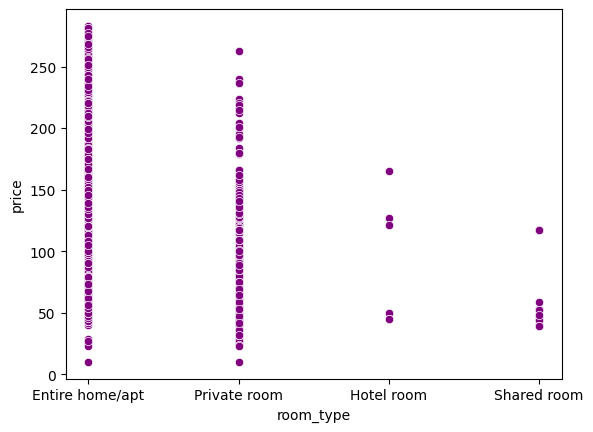

In [11]:
sns.scatterplot(x='room_type', y='price', color="purple", data=fil1)
sns.scatterplot(x='room_type', y='price', color="purple", data=fil2)
sns.scatterplot(x='room_type', y='price', color="purple", data=fil3)
sns.scatterplot(x='room_type', y='price', color="purple", data=fil4)

<Axes: xlabel='room_type', ylabel='price'>

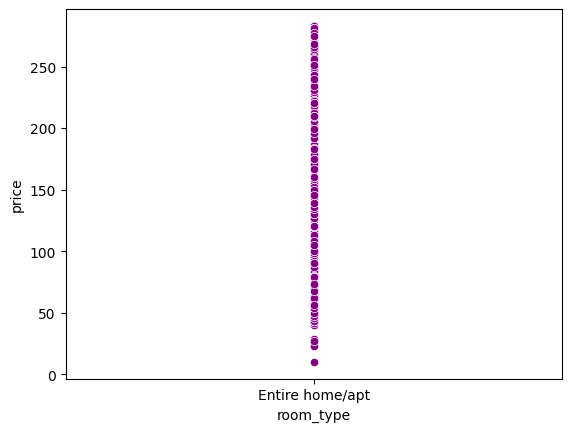

In [12]:
sns.scatterplot(x='room_type', y='price', color="purple", data=fil1)




<Axes: xlabel='room_type', ylabel='price'>

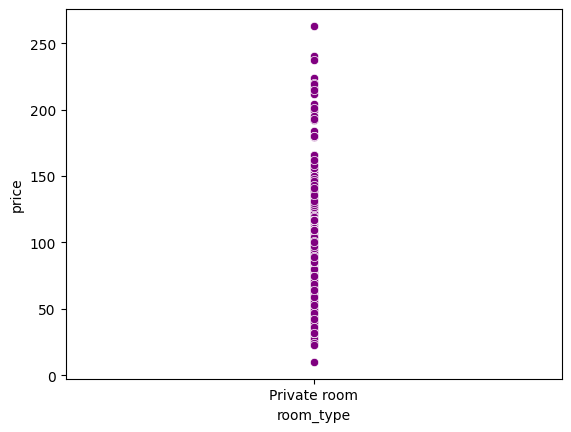

In [13]:
sns.scatterplot(x='room_type', y='price', color="purple", data=fil2)


<Axes: xlabel='room_type', ylabel='price'>

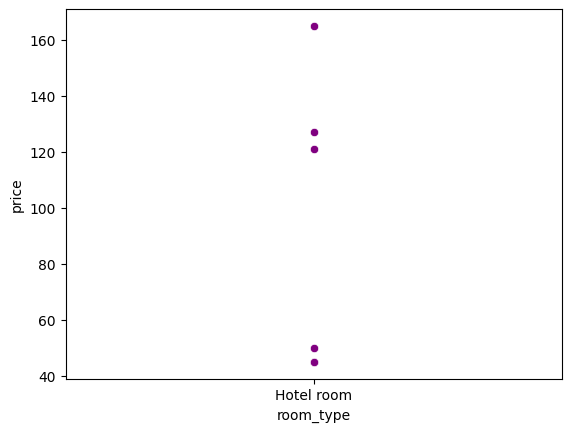

In [14]:
sns.scatterplot(x='room_type', y='price', color="purple", data=fil3)


<Axes: xlabel='room_type', ylabel='price'>

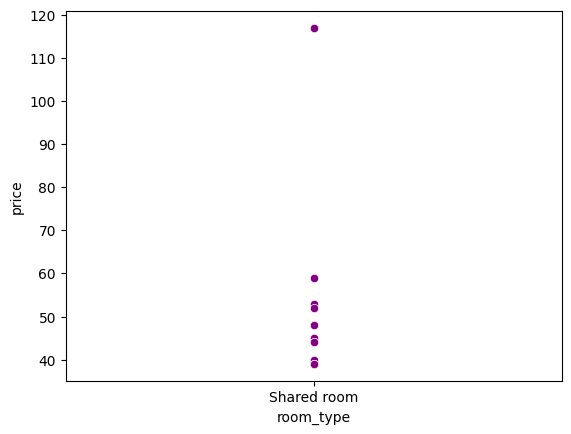

In [15]:
sns.scatterplot(x='room_type', y='price', color="purple", data=fil4)


<Axes: xlabel='host_is_superhost', ylabel='price'>

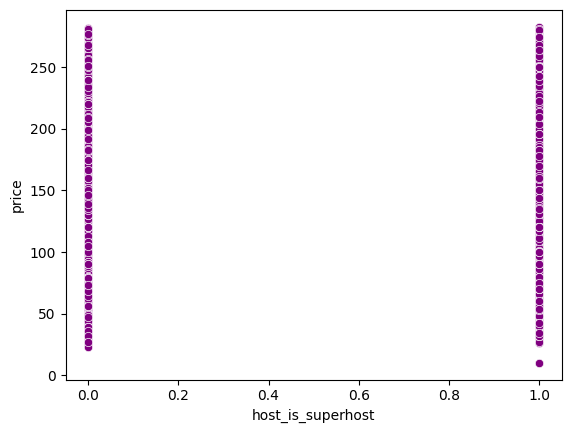

In [16]:
sns.scatterplot(x='host_is_superhost', y='price', color="purple", data=df)


<Axes: xlabel='accommodates', ylabel='bathrooms'>

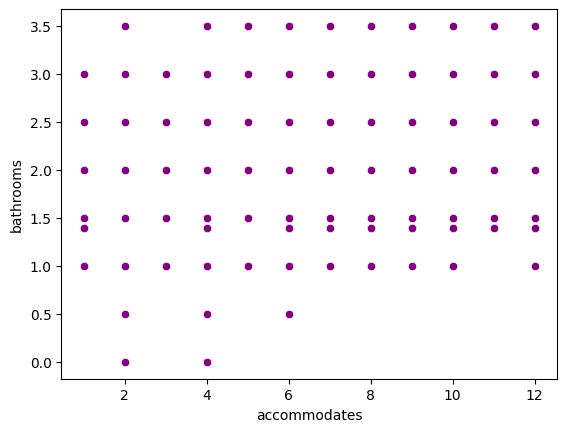

In [17]:
sns.scatterplot(x='accommodates', y='bathrooms', color="purple", data=df)
#host_acceptance_rate

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

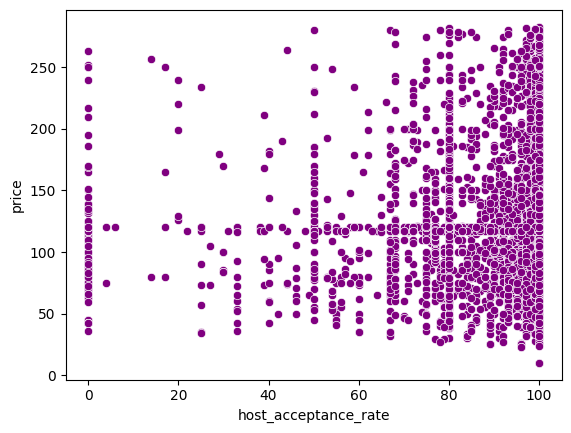

In [18]:
sns.scatterplot(x='host_acceptance_rate', y='price', color="purple", data=df)


<Axes: xlabel='accommodates', ylabel='bathrooms'>

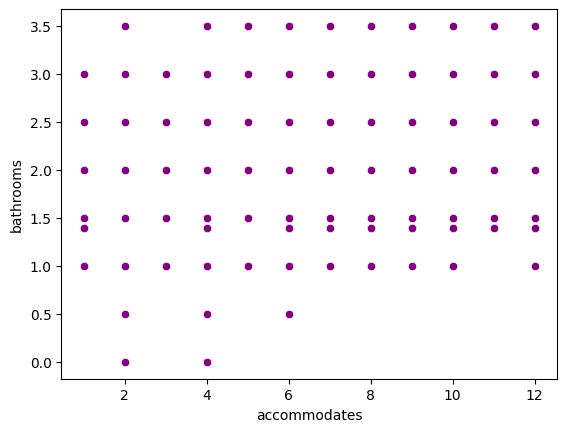

In [19]:
sns.scatterplot(x='accommodates', y='bathrooms', color="purple", data=df)

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

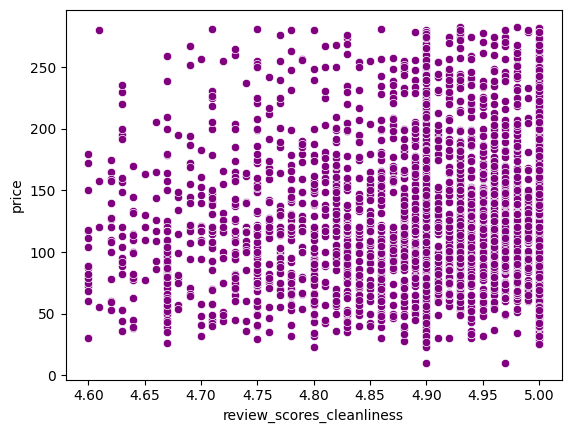

In [20]:
sns.scatterplot(x='review_scores_cleanliness', y='price', color="purple", data=df)

<Axes: xlabel='host_identity_verified', ylabel='price'>

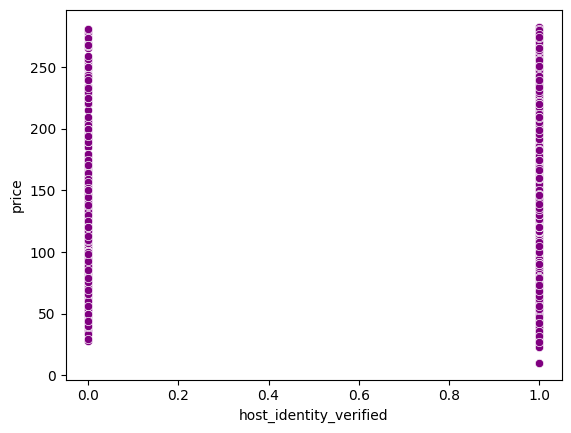

In [21]:
sns.scatterplot(x='host_identity_verified', y='price', color="purple", data=df)

<Axes: xlabel='instant_bookable', ylabel='price'>

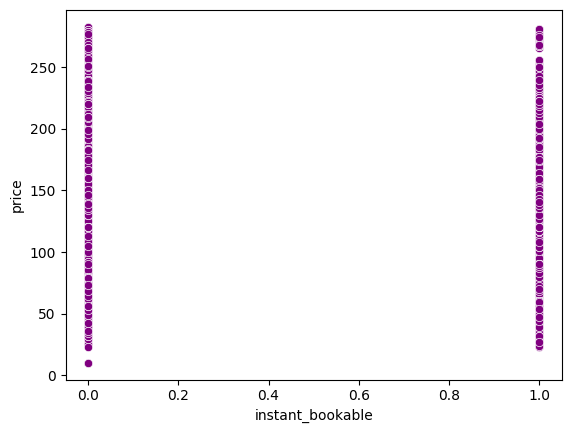

In [22]:
sns.scatterplot(x='instant_bookable', y='price', color="purple", data=df)

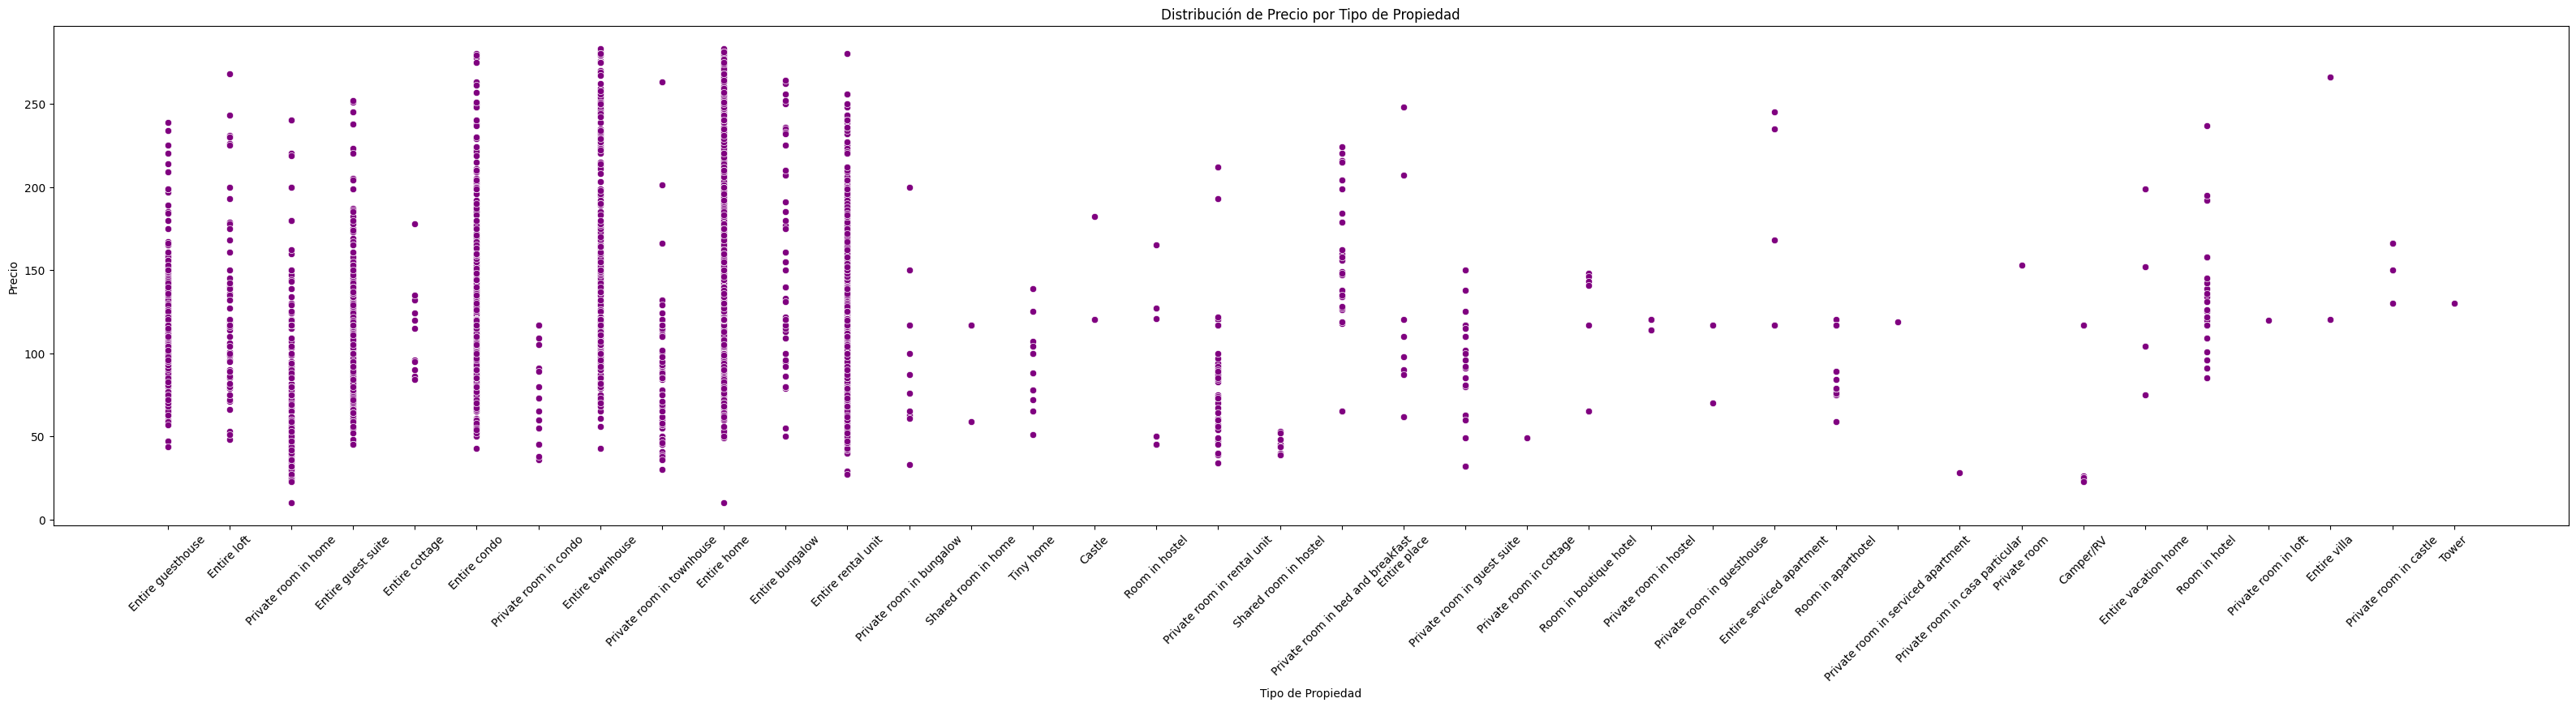

In [23]:
plt.figure(figsize=(40, 8))  # Ajusta el tamaño de la figura
sns.scatterplot(x='property_type', y='price', color="purple", data=df)

# Rotar las etiquetas del eje x si es necesario
plt.xticks(rotation=45)

# Añadir etiquetas y título
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Precio')
plt.title('Distribución de Precio por Tipo de Propiedad')

plt.show()

In [24]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model2=LinearRegression()
model3=LinearRegression()
model4=LinearRegression()
model5=LinearRegression()
model6=LinearRegression()
model7=LinearRegression()
model8=LinearRegression()

In [25]:
from sklearn.preprocessing import LabelEncoder

# Aplicar Label Encoding
le = LabelEncoder()
df['room_type'] = le.fit_transform(df['room_type'])
df['property_type'] = le.fit_transform(df['property_type'])


In [26]:
Var_Indep= df[['host_response_rate']]
Var_Dep= df[['price']]
Var_Indep2=df[['host_is_superhost']]
Var_Indep3=df[['room_type']]
Var_Indep4=df[['host_identity_verified']]
Var_Indep5=df[['property_type']]
Var_Indep6= df[['instant_bookable']]
Var_Indep7= df[['review_scores_cleanliness']]
Var_Indep8= df[['bathrooms']]
Var_Dep2= df[['accommodates']]

In [27]:
model.fit(X=Var_Indep, y=Var_Dep)
model2.fit(X=Var_Indep2, y=Var_Dep)
model3.fit(X=Var_Indep3, y=Var_Dep)
model4.fit(X=Var_Indep4, y=Var_Dep)
model5.fit(X=Var_Indep5, y=Var_Dep)
model6.fit(X=Var_Indep6, y=Var_Dep)
model7.fit(X=Var_Indep7, y=Var_Dep)
model8.fit(X=Var_Indep8, y=Var_Dep2)

LinearRegression()

In [28]:
y_pred= model.predict(X=df[['host_response_rate']])
y_pred

array([[120.36220426],
       [120.36220426],
       [120.36220426],
       ...,
       [120.36220426],
       [120.36220426],
       [120.36220426]], shape=(5151, 1))

In [29]:
y_pred2= model2.predict(X=df[['host_is_superhost']])
y_pred2

array([[122.0463008 ],
       [117.61897007],
       [122.0463008 ],
       ...,
       [122.0463008 ],
       [117.61897007],
       [117.61897007]], shape=(5151, 1))

In [30]:
y_pred3= model3.predict(X=df[['room_type']])
y_pred3

array([[126.17905566],
       [126.17905566],
       [ 83.41409561],
       ...,
       [ 83.41409561],
       [126.17905566],
       [126.17905566]], shape=(5151, 1))

In [31]:
y_pred4= model4.predict(X=df[['host_identity_verified']])
y_pred4

array([[119.78814898],
       [119.78814898],
       [119.78814898],
       ...,
       [119.78814898],
       [119.78814898],
       [119.78814898]], shape=(5151, 1))

In [32]:
y_pred5= model5.predict(X=df[['property_type']])
y_pred5

array([[127.72113251],
       [123.87633815],
       [ 93.11798327],
       ...,
       [ 93.11798327],
       [120.03154379],
       [120.03154379]], shape=(5151, 1))

In [33]:
y_pred6= model6.predict(X=df[['instant_bookable']])
y_pred6

array([[118.1602973 ],
       [118.1602973 ],
       [118.1602973 ],
       ...,
       [118.1602973 ],
       [118.1602973 ],
       [125.02308753]], shape=(5151, 1))

In [34]:
y_pred7= model7.predict(X=df[['review_scores_cleanliness']])
y_pred7

array([[121.02709279],
       [118.16881627],
       [119.88378218],
       ...,
       [119.88378218],
       [119.88378218],
       [119.88378218]], shape=(5151, 1))

In [35]:
y_pred8= model8.predict(X=df[['bathrooms']])
y_pred8

array([[3.09531339],
       [4.12082871],
       [3.09531339],
       ...,
       [3.09531339],
       [3.09531339],
       [3.09531339]], shape=(5151, 1))

In [36]:
datin = df[['host_response_rate', 'host_is_superhost', 'room_type',
            'host_identity_verified', 'property_type', 'instant_bookable',
            'review_scores_cleanliness', 'bathrooms', 'price', 'accommodates']]

In [37]:
datin.insert(0, 'Predicciones1', y_pred)
datin

,Predicciones1,host_response_rate,host_is_superhost,room_type,host_identity_verified,property_type,instant_bookable,review_scores_cleanliness,bathrooms,price,accommodates
0,120.362204,100,1,0,1,6,0,4.96,1.0,91.0,2.0
1,120.362204,100,0,0,1,8,0,4.81,1.5,179.0,3.0
2,120.362204,100,1,2,1,24,0,4.90,1.0,59.0,3.0
3,120.362204,100,1,2,1,24,0,4.90,1.0,58.0,2.0
4,120.362204,100,1,0,1,6,0,4.98,1.0,77.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
5146,117.994983,90,0,0,1,10,0,4.90,1.0,68.0,2.0
5147,117.994983,90,0,0,1,10,0,4.90,1.0,73.0,2.0
5148,120.362204,100,1,2,1,24,0,4.90,1.0,42.0,1.0
5149,120.362204,100,0,0,1,10,0,4.90,1.0,139.0,4.0


In [38]:
datin.insert(1, 'Predicciones2', y_pred2)
datin

,Predicciones1,Predicciones2,host_response_rate,host_is_superhost,room_type,host_identity_verified,property_type,instant_bookable,review_scores_cleanliness,bathrooms,price,accommodates
0,120.362204,122.046301,100,1,0,1,6,0,4.96,1.0,91.0,2.0
1,120.362204,117.618970,100,0,0,1,8,0,4.81,1.5,179.0,3.0
2,120.362204,122.046301,100,1,2,1,24,0,4.90,1.0,59.0,3.0
3,120.362204,122.046301,100,1,2,1,24,0,4.90,1.0,58.0,2.0
4,120.362204,122.046301,100,1,0,1,6,0,4.98,1.0,77.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5146,117.994983,117.618970,90,0,0,1,10,0,4.90,1.0,68.0,2.0
5147,117.994983,117.618970,90,0,0,1,10,0,4.90,1.0,73.0,2.0
5148,120.362204,122.046301,100,1,2,1,24,0,4.90,1.0,42.0,1.0
5149,120.362204,117.618970,100,0,0,1,10,0,4.90,1.0,139.0,4.0


In [39]:
datin.insert(2, 'Predicciones3', y_pred3)
datin

,Predicciones1,Predicciones2,Predicciones3,host_response_rate,host_is_superhost,room_type,host_identity_verified,property_type,instant_bookable,review_scores_cleanliness,bathrooms,price,accommodates
0,120.362204,122.046301,126.179056,100,1,0,1,6,0,4.96,1.0,91.0,2.0
1,120.362204,117.618970,126.179056,100,0,0,1,8,0,4.81,1.5,179.0,3.0
2,120.362204,122.046301,83.414096,100,1,2,1,24,0,4.90,1.0,59.0,3.0
3,120.362204,122.046301,83.414096,100,1,2,1,24,0,4.90,1.0,58.0,2.0
4,120.362204,122.046301,126.179056,100,1,0,1,6,0,4.98,1.0,77.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5146,117.994983,117.618970,126.179056,90,0,0,1,10,0,4.90,1.0,68.0,2.0
5147,117.994983,117.618970,126.179056,90,0,0,1,10,0,4.90,1.0,73.0,2.0
5148,120.362204,122.046301,83.414096,100,1,2,1,24,0,4.90,1.0,42.0,1.0
5149,120.362204,117.618970,126.179056,100,0,0,1,10,0,4.90,1.0,139.0,4.0


In [40]:
datin.insert(3, 'Predicciones4', y_pred4)
datin

,Predicciones1,Predicciones2,Predicciones3,Predicciones4,host_response_rate,host_is_superhost,room_type,host_identity_verified,property_type,instant_bookable,review_scores_cleanliness,bathrooms,price,accommodates
0,120.362204,122.046301,126.179056,119.788149,100,1,0,1,6,0,4.96,1.0,91.0,2.0
1,120.362204,117.618970,126.179056,119.788149,100,0,0,1,8,0,4.81,1.5,179.0,3.0
2,120.362204,122.046301,83.414096,119.788149,100,1,2,1,24,0,4.90,1.0,59.0,3.0
3,120.362204,122.046301,83.414096,119.788149,100,1,2,1,24,0,4.90,1.0,58.0,2.0
4,120.362204,122.046301,126.179056,119.788149,100,1,0,1,6,0,4.98,1.0,77.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5146,117.994983,117.618970,126.179056,119.788149,90,0,0,1,10,0,4.90,1.0,68.0,2.0
5147,117.994983,117.618970,126.179056,119.788149,90,0,0,1,10,0,4.90,1.0,73.0,2.0
5148,120.362204,122.046301,83.414096,119.788149,100,1,2,1,24,0,4.90,1.0,42.0,1.0
5149,120.362204,117.618970,126.179056,119.788149,100,0,0,1,10,0,4.90,1.0,139.0,4.0


In [41]:
datin.insert(4, 'Predicciones5', y_pred5)
datin

,Predicciones1,Predicciones2,Predicciones3,Predicciones4,Predicciones5,host_response_rate,host_is_superhost,room_type,host_identity_verified,property_type,instant_bookable,review_scores_cleanliness,bathrooms,price,accommodates
0,120.362204,122.046301,126.179056,119.788149,127.721133,100,1,0,1,6,0,4.96,1.0,91.0,2.0
1,120.362204,117.618970,126.179056,119.788149,123.876338,100,0,0,1,8,0,4.81,1.5,179.0,3.0
2,120.362204,122.046301,83.414096,119.788149,93.117983,100,1,2,1,24,0,4.90,1.0,59.0,3.0
3,120.362204,122.046301,83.414096,119.788149,93.117983,100,1,2,1,24,0,4.90,1.0,58.0,2.0
4,120.362204,122.046301,126.179056,119.788149,127.721133,100,1,0,1,6,0,4.98,1.0,77.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5146,117.994983,117.618970,126.179056,119.788149,120.031544,90,0,0,1,10,0,4.90,1.0,68.0,2.0
5147,117.994983,117.618970,126.179056,119.788149,120.031544,90,0,0,1,10,0,4.90,1.0,73.0,2.0
5148,120.362204,122.046301,83.414096,119.788149,93.117983,100,1,2,1,24,0,4.90,1.0,42.0,1.0
5149,120.362204,117.618970,126.179056,119.788149,120.031544,100,0,0,1,10,0,4.90,1.0,139.0,4.0


In [42]:
datin.insert(5, 'Predicciones6', y_pred6)
datin

,Predicciones1,Predicciones2,Predicciones3,Predicciones4,Predicciones5,Predicciones6,host_response_rate,host_is_superhost,room_type,host_identity_verified,property_type,instant_bookable,review_scores_cleanliness,bathrooms,price,accommodates
0,120.362204,122.046301,126.179056,119.788149,127.721133,118.160297,100,1,0,1,6,0,4.96,1.0,91.0,2.0
1,120.362204,117.618970,126.179056,119.788149,123.876338,118.160297,100,0,0,1,8,0,4.81,1.5,179.0,3.0
2,120.362204,122.046301,83.414096,119.788149,93.117983,118.160297,100,1,2,1,24,0,4.90,1.0,59.0,3.0
3,120.362204,122.046301,83.414096,119.788149,93.117983,118.160297,100,1,2,1,24,0,4.90,1.0,58.0,2.0
4,120.362204,122.046301,126.179056,119.788149,127.721133,118.160297,100,1,0,1,6,0,4.98,1.0,77.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5146,117.994983,117.618970,126.179056,119.788149,120.031544,118.160297,90,0,0,1,10,0,4.90,1.0,68.0,2.0
5147,117.994983,117.618970,126.179056,119.788149,120.031544,118.160297,90,0,0,1,10,0,4.90,1.0,73.0,2.0
5148,120.362204,122.046301,83.414096,119.788149,93.117983,118.160297,100,1,2,1,24,0,4.90,1.0,42.0,1.0
5149,120.362204,117.618970,126.179056,119.788149,120.031544,118.160297,100,0,0,1,10,0,4.90,1.0,139.0,4.0


In [43]:
datin.insert(6, 'Predicciones7', y_pred7)
datin

,Predicciones1,Predicciones2,Predicciones3,Predicciones4,Predicciones5,Predicciones6,Predicciones7,host_response_rate,host_is_superhost,room_type,host_identity_verified,property_type,instant_bookable,review_scores_cleanliness,bathrooms,price,accommodates
0,120.362204,122.046301,126.179056,119.788149,127.721133,118.160297,121.027093,100,1,0,1,6,0,4.96,1.0,91.0,2.0
1,120.362204,117.618970,126.179056,119.788149,123.876338,118.160297,118.168816,100,0,0,1,8,0,4.81,1.5,179.0,3.0
2,120.362204,122.046301,83.414096,119.788149,93.117983,118.160297,119.883782,100,1,2,1,24,0,4.90,1.0,59.0,3.0
3,120.362204,122.046301,83.414096,119.788149,93.117983,118.160297,119.883782,100,1,2,1,24,0,4.90,1.0,58.0,2.0
4,120.362204,122.046301,126.179056,119.788149,127.721133,118.160297,121.408196,100,1,0,1,6,0,4.98,1.0,77.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5146,117.994983,117.618970,126.179056,119.788149,120.031544,118.160297,119.883782,90,0,0,1,10,0,4.90,1.0,68.0,2.0
5147,117.994983,117.618970,126.179056,119.788149,120.031544,118.160297,119.883782,90,0,0,1,10,0,4.90,1.0,73.0,2.0
5148,120.362204,122.046301,83.414096,119.788149,93.117983,118.160297,119.883782,100,1,2,1,24,0,4.90,1.0,42.0,1.0
5149,120.362204,117.618970,126.179056,119.788149,120.031544,118.160297,119.883782,100,0,0,1,10,0,4.90,1.0,139.0,4.0


In [44]:
datin.insert(7, 'Predicciones8', y_pred8)
datin

,Predicciones1,Predicciones2,Predicciones3,Predicciones4,Predicciones5,Predicciones6,Predicciones7,Predicciones8,host_response_rate,host_is_superhost,room_type,host_identity_verified,property_type,instant_bookable,review_scores_cleanliness,bathrooms,price,accommodates
0,120.362204,122.046301,126.179056,119.788149,127.721133,118.160297,121.027093,3.095313,100,1,0,1,6,0,4.96,1.0,91.0,2.0
1,120.362204,117.618970,126.179056,119.788149,123.876338,118.160297,118.168816,4.120829,100,0,0,1,8,0,4.81,1.5,179.0,3.0
2,120.362204,122.046301,83.414096,119.788149,93.117983,118.160297,119.883782,3.095313,100,1,2,1,24,0,4.90,1.0,59.0,3.0
3,120.362204,122.046301,83.414096,119.788149,93.117983,118.160297,119.883782,3.095313,100,1,2,1,24,0,4.90,1.0,58.0,2.0
4,120.362204,122.046301,126.179056,119.788149,127.721133,118.160297,121.408196,3.095313,100,1,0,1,6,0,4.98,1.0,77.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5146,117.994983,117.618970,126.179056,119.788149,120.031544,118.160297,119.883782,3.095313,90,0,0,1,10,0,4.90,1.0,68.0,2.0
5147,117.994983,117.618970,126.179056,119.788149,120.031544,118.160297,119.883782,3.095313,90,0,0,1,10,0,4.90,1.0,73.0,2.0
5148,120.362204,122.046301,83.414096,119.788149,93.117983,118.160297,119.883782,3.095313,100,1,2,1,24,0,4.90,1.0,42.0,1.0
5149,120.362204,117.618970,126.179056,119.788149,120.031544,118.160297,119.883782,3.095313,100,0,0,1,10,0,4.90,1.0,139.0,4.0


<Axes: xlabel='host_response_rate', ylabel='price'>

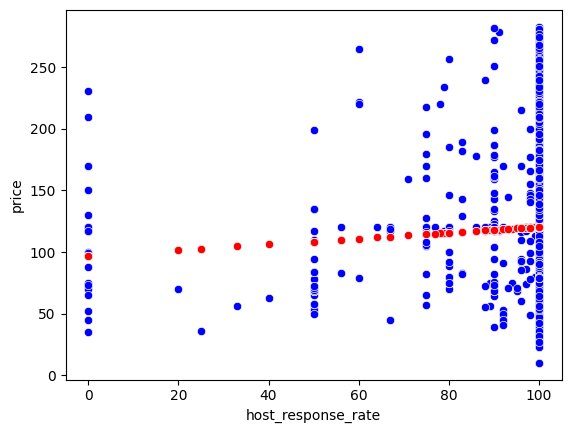

In [45]:
sns.scatterplot(x='host_response_rate', y='price', color='blue', data=datin)
sns.scatterplot(x='host_response_rate', y='Predicciones1', color='red', data=datin)

<Axes: xlabel='host_is_superhost', ylabel='price'>

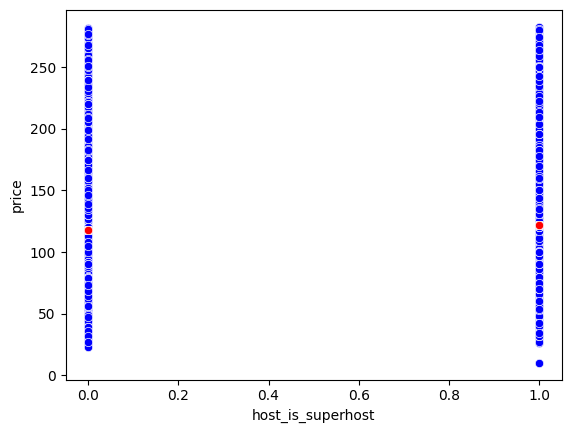

In [46]:
sns.scatterplot(x='host_is_superhost', y='price', color='blue', data=datin)
sns.scatterplot(x='host_is_superhost', y='Predicciones2', color='red', data=datin)

<Axes: xlabel='room_type', ylabel='price'>

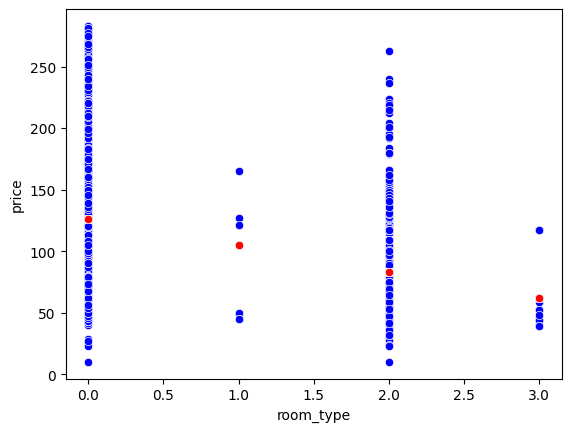

In [47]:

sns.scatterplot(x='room_type', y='price', color='blue', data=datin)
sns.scatterplot(x='room_type', y='Predicciones3', color='red', data=datin)

<Axes: xlabel='host_identity_verified', ylabel='price'>

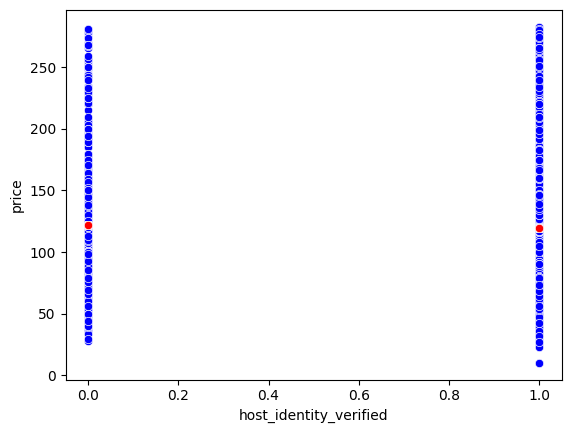

In [48]:
sns.scatterplot(x='host_identity_verified', y='price', color='blue', data=datin)
sns.scatterplot(x='host_identity_verified', y='Predicciones4', color='red', data=datin)

<Axes: xlabel='property_type', ylabel='price'>

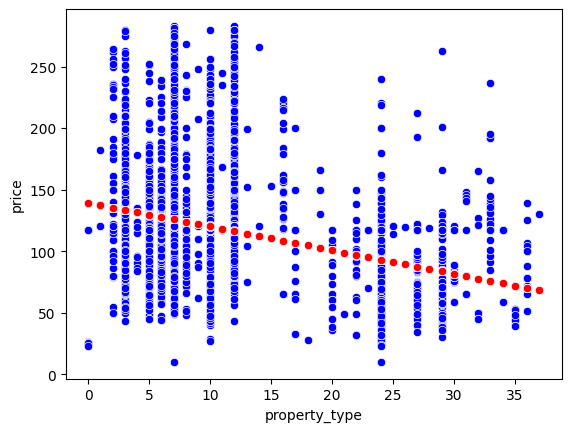

In [49]:
sns.scatterplot(x='property_type', y='price', color='blue', data=datin)
sns.scatterplot(x='property_type', y='Predicciones5', color='red', data=datin)

<Axes: xlabel='instant_bookable', ylabel='price'>

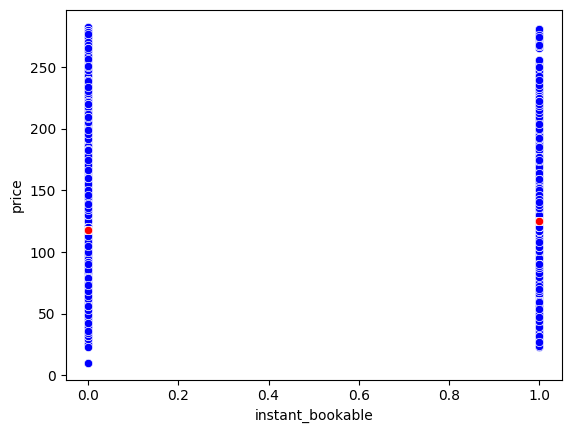

In [50]:
sns.scatterplot(x='instant_bookable', y='price', color='blue', data=datin)
sns.scatterplot(x='instant_bookable', y='Predicciones6', color='red', data=datin)

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

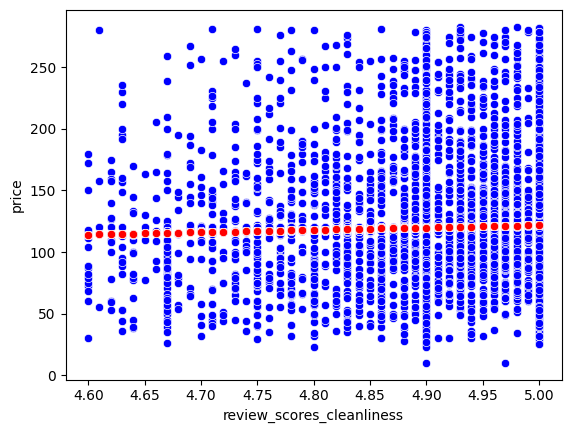

In [51]:
sns.scatterplot(x='review_scores_cleanliness', y='price', color='blue', data=datin)
sns.scatterplot(x='review_scores_cleanliness', y='Predicciones7', color='red', data=datin)

<Axes: xlabel='bathrooms', ylabel='accommodates'>

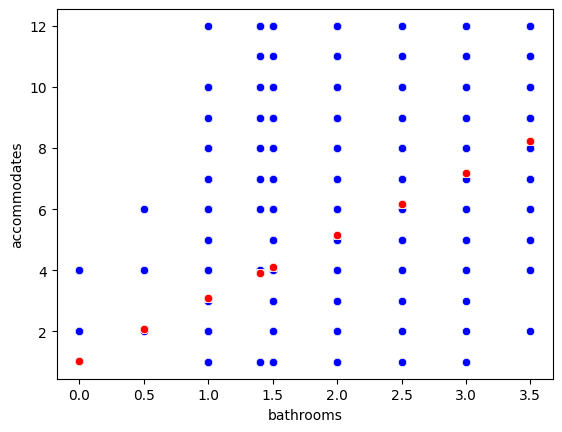

In [52]:
sns.scatterplot(x='bathrooms', y='accommodates', color='blue', data=datin)
sns.scatterplot(x='bathrooms', y='Predicciones8', color='red', data=datin)

In [53]:
coef_Deter= model.score(X=Var_Indep, y=Var_Dep)
coef_Deter

0.0014758860208571312

In [54]:
coef_Deter2= model2.score(X=Var_Indep2, y=Var_Dep)
coef_Deter2

0.001966369092474274

In [55]:
coef_Deter3= model3.score(X=Var_Indep3, y=Var_Dep)
coef_Deter3

0.09234860449773852

In [56]:
coef_Deter4= model4.score(X=Var_Indep4, y=Var_Dep)
coef_Deter4

0.000233115525834382

In [57]:
coef_Deter5= model5.score(X=Var_Indep5, y=Var_Dep)
coef_Deter5

0.0725072116310792

In [58]:
coef_Deter6= model6.score(X=Var_Indep6, y=Var_Dep)
coef_Deter6

0.0038779454979677164

In [59]:
coef_Deter7= model7.score(X=Var_Indep7, y=Var_Dep)
coef_Deter7

0.0011633893046657517

In [60]:
coef_Deter8= model8.score(X=Var_Indep8, y=Var_Dep2)
coef_Deter8

0.33710130041054975

In [61]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.03841726201666552)

In [62]:
coef_Correl2=np.sqrt(coef_Deter2)
coef_Correl2

np.float64(0.04434376046834858)

In [63]:
coef_Correl3=np.sqrt(coef_Deter2)
coef_Correl3

np.float64(0.04434376046834858)

In [64]:
coef_Correl4=np.sqrt(coef_Deter4)
coef_Correl4

np.float64(0.015268121228048393)

In [65]:
coef_Correl5=np.sqrt(coef_Deter5)
coef_Correl5

np.float64(0.26927163168644264)

In [66]:
coef_Correl6=np.sqrt(coef_Deter6)
coef_Correl6

np.float64(0.06227315230472692)

In [67]:
coef_Correl7=np.sqrt(coef_Deter7)
coef_Correl7

np.float64(0.034108493145633856)

In [68]:
coef_Correl8=np.sqrt(coef_Deter8)
coef_Correl8

np.float64(0.5806042545577407)

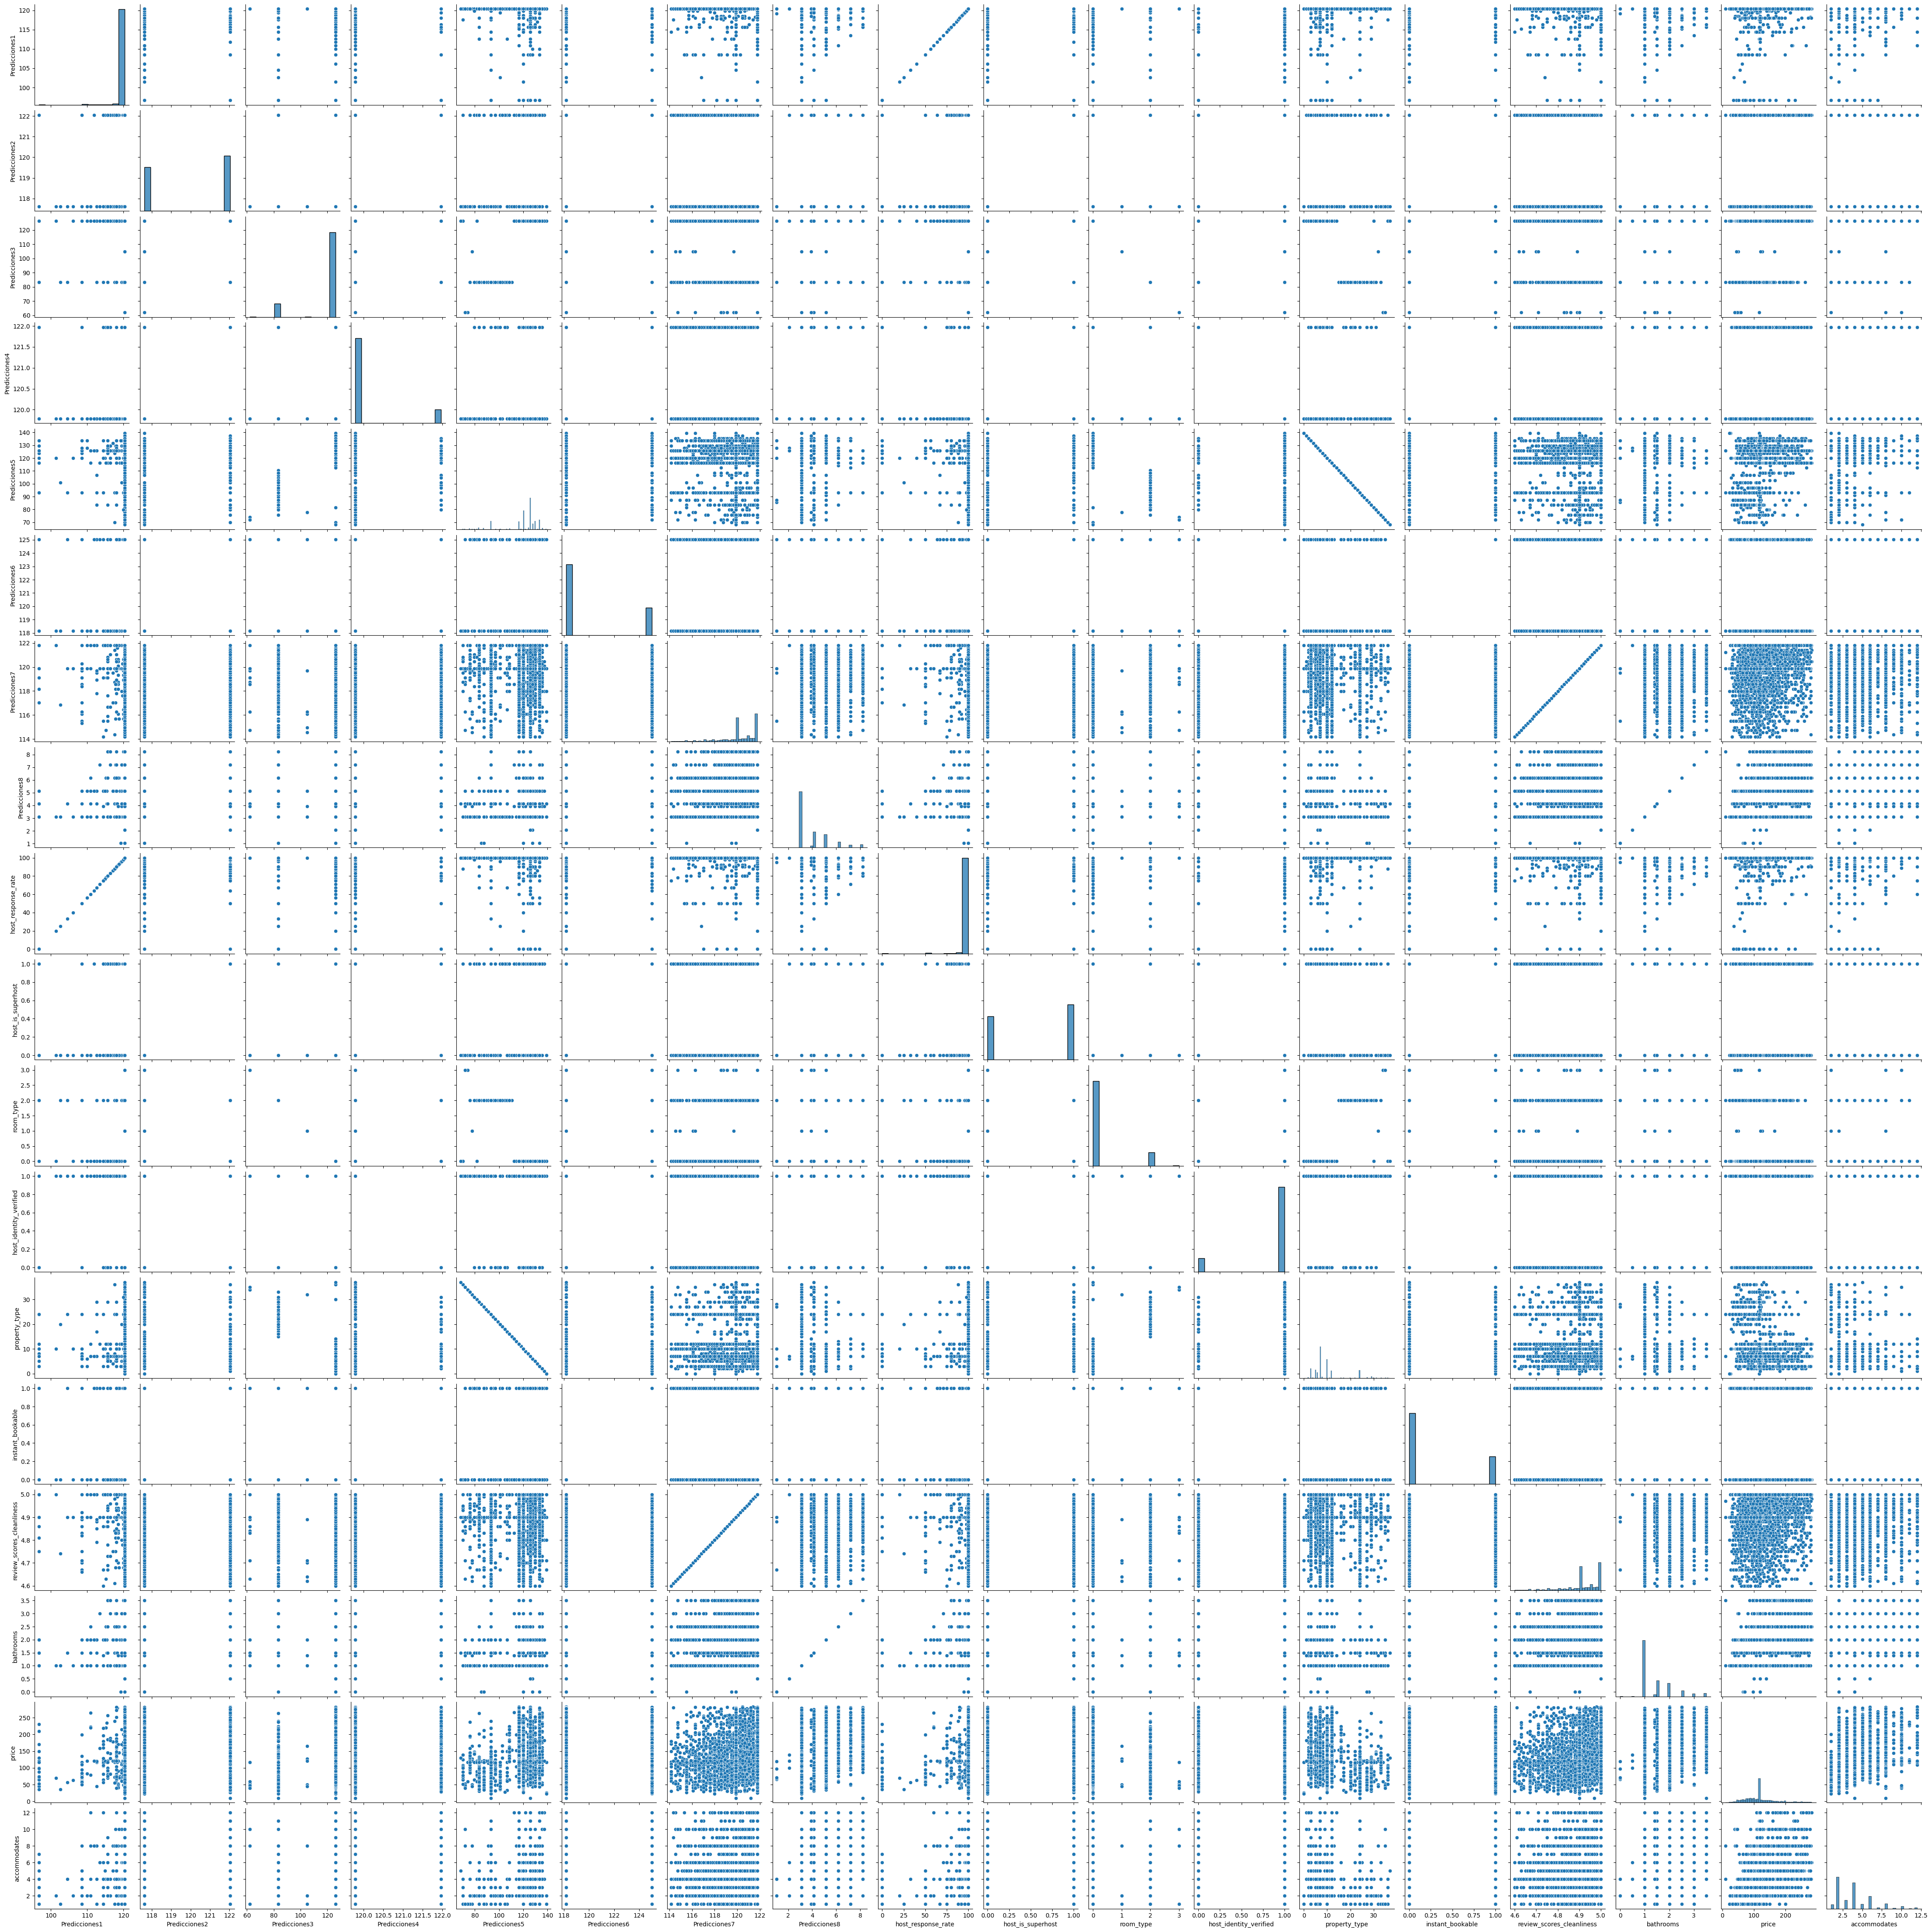

In [69]:
sns.pairplot(datin)

In [70]:
Corr_Factors= datin.corr()
Corr_Factors

,Predicciones1,Predicciones2,Predicciones3,Predicciones4,Predicciones5,Predicciones6,Predicciones7,Predicciones8,host_response_rate,host_is_superhost,room_type,host_identity_verified,property_type,instant_bookable,review_scores_cleanliness,bathrooms,price,accommodates
Predicciones1,1.000000,0.110519,-0.000208,-0.013672,-0.014570,0.057082,0.031554,0.020987,1.000000,0.110519,0.000208,0.013672,0.014570,0.057082,0.031554,0.020987,0.038417,0.030267
Predicciones2,0.110519,1.000000,0.068472,-0.101403,0.089432,0.036513,0.094670,-0.016170,0.110519,1.000000,-0.068472,0.101403,-0.089432,0.036513,0.094670,-0.016170,0.044344,0.016380
Predicciones3,-0.000208,0.068472,1.000000,0.023191,0.879095,-0.022689,-0.000856,0.149580,-0.000208,0.068472,-1.000000,-0.023191,-0.879095,-0.022689,-0.000856,0.149580,0.303889,0.321203
Predicciones4,-0.013672,-0.101403,0.023191,1.000000,0.029958,0.069534,-0.037425,0.010970,-0.013672,-0.101403,-0.023191,-1.000000,-0.029958,0.069534,-0.037425,0.010970,0.015268,0.009508
Predicciones5,-0.014570,0.089432,0.879095,0.029958,1.000000,-0.032616,0.010635,0.098731,-0.014570,0.089432,-0.879095,-0.029958,-1.000000,-0.032616,0.010635,0.098731,0.269272,0.284687
Predicciones6,0.057082,0.036513,-0.022689,0.069534,-0.032616,1.000000,-0.066241,0.018915,0.057082,0.036513,0.022689,-0.069534,0.032616,1.000000,-0.066241,0.018915,0.062273,0.088967
Predicciones7,0.031554,0.094670,-0.000856,-0.037425,0.010635,-0.066241,1.000000,-0.014425,0.031554,0.094670,0.000856,0.037425,-0.010635,-0.066241,1.000000,-0.014425,0.034108,-0.069868
Predicciones8,0.020987,-0.016170,0.149580,0.010970,0.098731,0.018915,-0.014425,1.000000,0.020987,-0.016170,-0.149580,-0.010970,-0.098731,0.018915,-0.014425,1.000000,0.391269,0.580604
host_response_rate,1.000000,0.110519,-0.000208,-0.013672,-0.014570,0.057082,0.031554,0.020987,1.000000,0.110519,0.000208,0.013672,0.014570,0.057082,0.031554,0.020987,0.038417,0.030267
host_is_superhost,0.110519,1.000000,0.068472,-0.101403,0.089432,0.036513,0.094670,-0.016170,0.110519,1.000000,-0.068472,0.101403,-0.089432,0.036513,0.094670,-0.016170,0.044344,0.016380


In [71]:
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,Predicciones1,Predicciones2,Predicciones3,Predicciones4,Predicciones5,Predicciones6,Predicciones7,Predicciones8,host_response_rate,host_is_superhost,room_type,host_identity_verified,property_type,instant_bookable,review_scores_cleanliness,bathrooms,price,accommodates
Predicciones1,1.000000,0.110519,0.000208,0.013672,0.014570,0.057082,0.031554,0.020987,1.000000,0.110519,0.000208,0.013672,0.014570,0.057082,0.031554,0.020987,0.038417,0.030267
Predicciones2,0.110519,1.000000,0.068472,0.101403,0.089432,0.036513,0.094670,0.016170,0.110519,1.000000,0.068472,0.101403,0.089432,0.036513,0.094670,0.016170,0.044344,0.016380
Predicciones3,0.000208,0.068472,1.000000,0.023191,0.879095,0.022689,0.000856,0.149580,0.000208,0.068472,1.000000,0.023191,0.879095,0.022689,0.000856,0.149580,0.303889,0.321203
Predicciones4,0.013672,0.101403,0.023191,1.000000,0.029958,0.069534,0.037425,0.010970,0.013672,0.101403,0.023191,1.000000,0.029958,0.069534,0.037425,0.010970,0.015268,0.009508
Predicciones5,0.014570,0.089432,0.879095,0.029958,1.000000,0.032616,0.010635,0.098731,0.014570,0.089432,0.879095,0.029958,1.000000,0.032616,0.010635,0.098731,0.269272,0.284687
Predicciones6,0.057082,0.036513,0.022689,0.069534,0.032616,1.000000,0.066241,0.018915,0.057082,0.036513,0.022689,0.069534,0.032616,1.000000,0.066241,0.018915,0.062273,0.088967
Predicciones7,0.031554,0.094670,0.000856,0.037425,0.010635,0.066241,1.000000,0.014425,0.031554,0.094670,0.000856,0.037425,0.010635,0.066241,1.000000,0.014425,0.034108,0.069868
Predicciones8,0.020987,0.016170,0.149580,0.010970,0.098731,0.018915,0.014425,1.000000,0.020987,0.016170,0.149580,0.010970,0.098731,0.018915,0.014425,1.000000,0.391269,0.580604
host_response_rate,1.000000,0.110519,0.000208,0.013672,0.014570,0.057082,0.031554,0.020987,1.000000,0.110519,0.000208,0.013672,0.014570,0.057082,0.031554,0.020987,0.038417,0.030267
host_is_superhost,0.110519,1.000000,0.068472,0.101403,0.089432,0.036513,0.094670,0.016170,0.110519,1.000000,0.068472,0.101403,0.089432,0.036513,0.094670,0.016170,0.044344,0.016380


<Axes: >

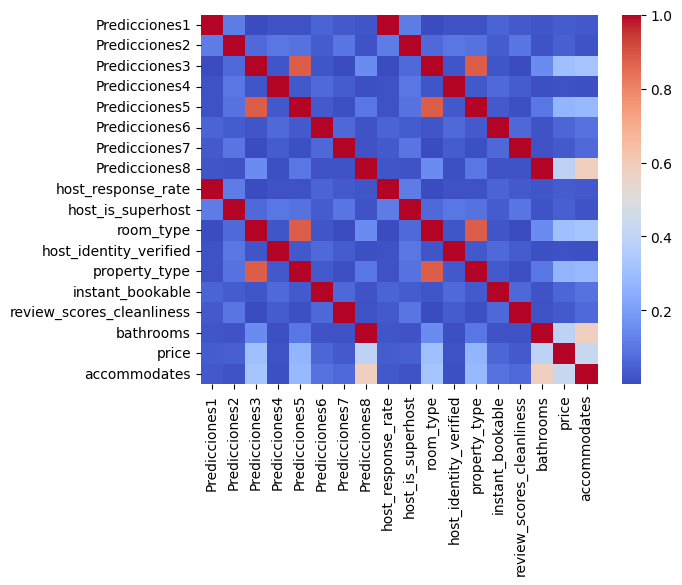

In [72]:
Heart_Nap = sns.heatmap(Corr_Factors1, cmap= 'coolwarm')
Heart_Nap

<Axes: >

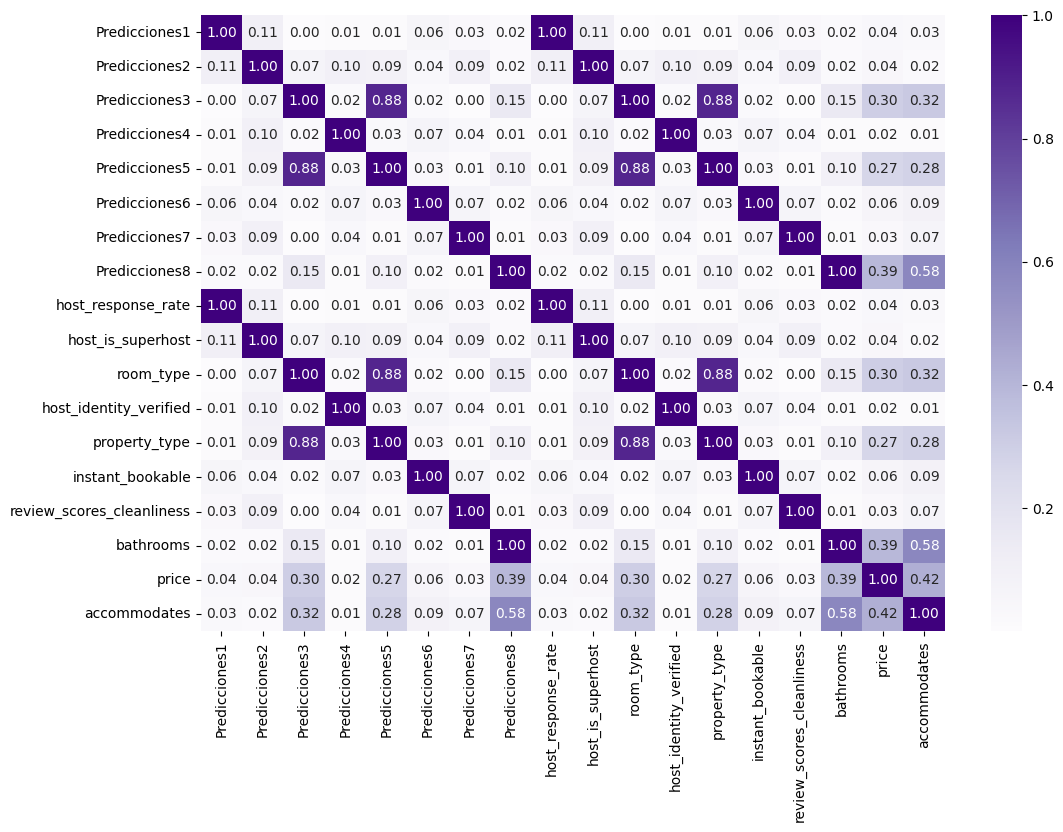

In [73]:
plt.figure(figsize=(12,8))
Heart_Nap = sns.heatmap(Corr_Factors1, cmap= 'Purples', annot=True, fmt=".2f")
Heart_Nap

**Modelo Matematico**

In [74]:
tipos_alojamiento = datin['room_type'].unique()  # Obtener tipos de alojamiento únicos
datin_tipos = {tipo: datin[datin['room_type'] == tipo] for tipo in tipos_alojamiento}  # Crear diccionario con DataFrames filtrado

In [75]:
corr_results = {}

for tipo, datin_tipo in datin_tipos.items():
    # Seleccionar solo columnas numéricas
    datin_numerico = datin_tipo.select_dtypes(include=[np.number])

    # Calcular correlaciones con la variable 'price'
    correlaciones = datin_numerico.corr()['price'].dropna()

    # Obtener la variable con mayor correlación absoluta (positiva o negativa)
    mejor_variable = correlaciones.abs().idxmax()
    mejor_corr = correlaciones[mejor_variable]

    corr_results[tipo] = (mejor_variable, mejor_corr)

corr_results

{np.int64(0): ('price', np.float64(1.0)),
 np.int64(2): ('price', np.float64(1.0)),
 np.int64(3): ('price', np.float64(1.0)),
 np.int64(1): ('price', np.float64(1.0))}

In [76]:
#modelo de regrecion lineal
modelos = {}

for tipo, (variable, _) in corr_results.items():
    datin_tipo = datin_tipos[tipo].dropna(subset=[variable, 'price'])  # Eliminar valores nulos
    X = datin_tipo[[variable]]
    y = datin_tipo['price']

    # Entrenar modelo de regresión
    modelo = LinearRegression()
    modelo.fit(X, y)

    # Guardar modelo entrenado
    modelos[tipo] = (modelo, variable)
modelos

{np.int64(0): (LinearRegression(), 'price'),
 np.int64(2): (LinearRegression(), 'price'),
 np.int64(3): (LinearRegression(), 'price'),
 np.int64(1): (LinearRegression(), 'price')}

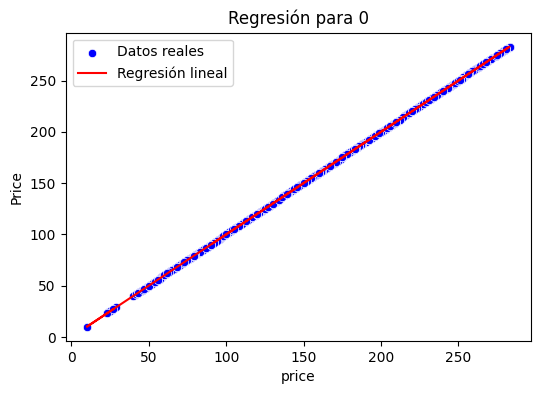

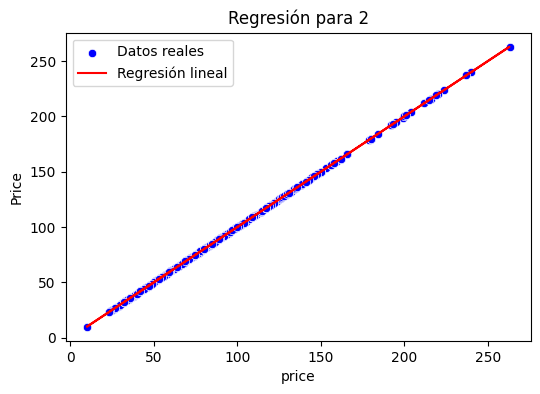

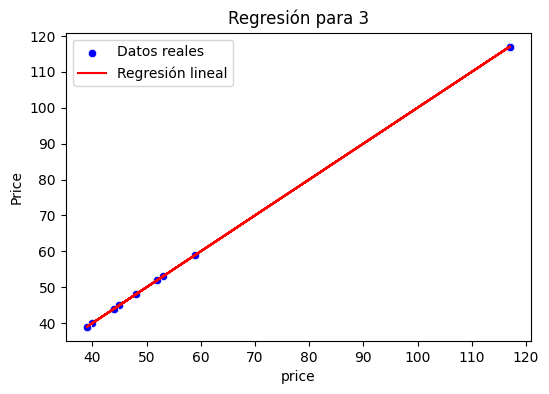

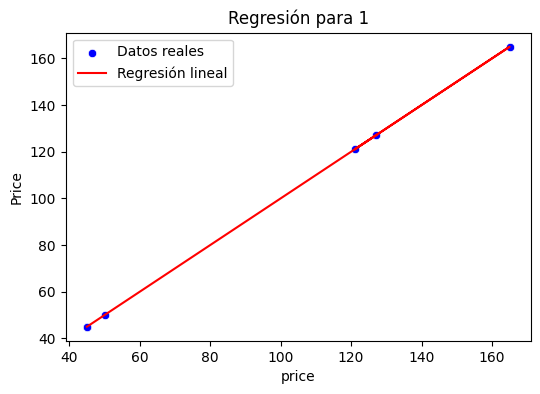

In [77]:
for tipo, (modelo, variable) in modelos.items():
    datin_tipo = datin_tipos[tipo].dropna(subset=[variable, 'price'])
    X = datin_tipo[[variable]]
    y = datin_tipo['price']
    y_pred = modelo.predict(X)

    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=X[variable], y=y, color='blue', label="Datos reales")
    plt.plot(X[variable], y_pred, color='red', label="Regresión lineal")
    plt.xlabel(variable)
    plt.ylabel("Price")
    plt.title(f"Regresión para {tipo}")
    plt.legend()
    plt.show()

**Mejor Modelo de regrecion lineal para cada variable cuantitativa**



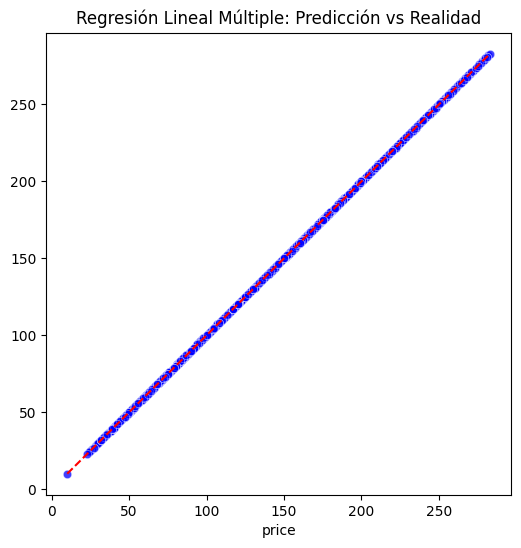

In [78]:
variables_cuantitativas= ['host_id', 'host_acceptance_rate', 'host_is_superhost', 'host_total_listings_count','room_type', 'reviews_per_month', 'review_scores_value', 'bedrooms', 'price', 'accommodates']
x = df[variables_cuantitativas]
y = df['price']
modelo = LinearRegression()
modelo.fit(x, y)
y_pred = modelo.predict(x)
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y, y=y_pred, color="blue", alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linestyle="--")
plt.title("Regresión Lineal Múltiple: Predicción vs Realidad")
plt.show()